In [1]:
# -------------------------------------------
# 1. Import des librairies
# -------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Affichage complet
pd.set_option('display.max_columns', None)

In [5]:
# ------------------------------------------
# 2. Chargement du dataset
# -------------------------------------------

df = pd.read_excel('Online Retail.xlsx')

In [6]:
# -------------------------------------------
# 3. Exploration initiale
# -------------------------------------------
print(df.head())
print(df.info())
print(df.describe())

# Vérifier les valeurs manquantes
print(df.isnull().sum())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

In [7]:
# -------------------------------------------
# 4. Nettoyage des données
# -------------------------------------------
# Supprimer lignes avec CustomerID manquant
df_clean = df.dropna(subset=['CustomerID'])

# Supprimer les retours produits (quantité négative)
df_clean = df_clean[df_clean['Quantity'] > 0]

# Créer une colonne 'TotalPrice'
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [8]:
# -------------------------------------------
# 5. Analyse : indicateurs clés
# -------------------------------------------
# Top 10 produits les plus vendus
top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 produits les plus vendus :\n", top_products)

# Pic d'achats par heure
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour
sales_by_hour = df_clean.groupby('Hour')['Quantity'].sum()
print("Ventes par heure :\n", sales_by_hour)

# Pays les plus actifs
top_countries = df_clean.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Pays les plus actifs :\n", top_countries)


Top 10 produits les plus vendus :
 Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64
Ventes par heure :
 Hour
6          1
7      15370
8     158265
9     482330
10    775962
11    648983
12    825226
13    682840
14    558649
15    553116
16    254082
17    129588
18     55013
19     32684
20      9587
Name: Quantity, dtype: int64
Pays les plus actifs :
 Country
United Kingdom    4269472
Netherlands        200937
EIRE               140525
Germany            119263
France             111472
Australia           84209
Sweden              36083
Switzerland         3

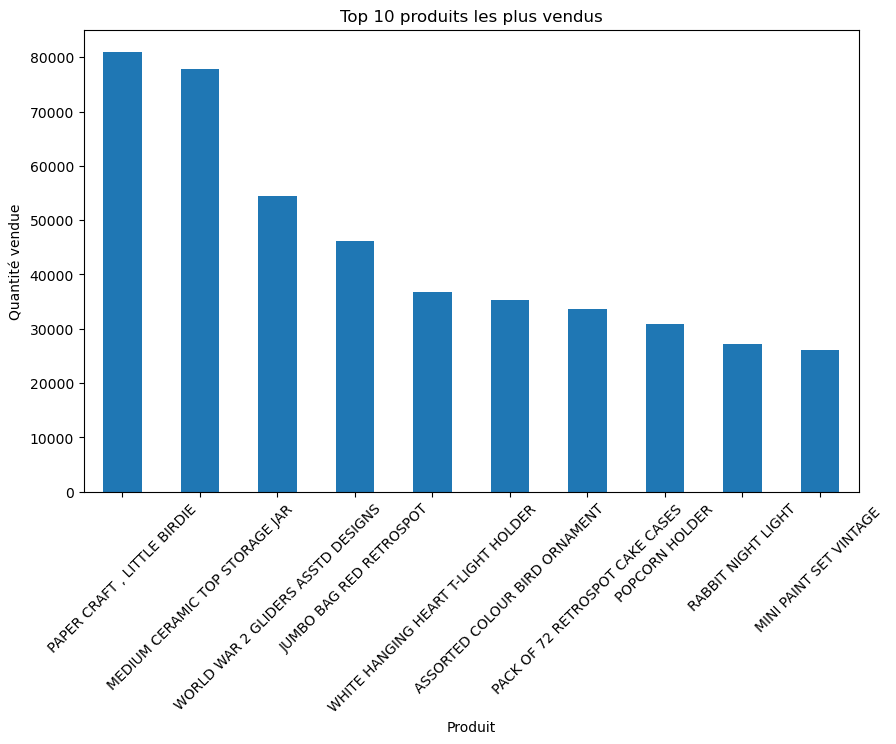

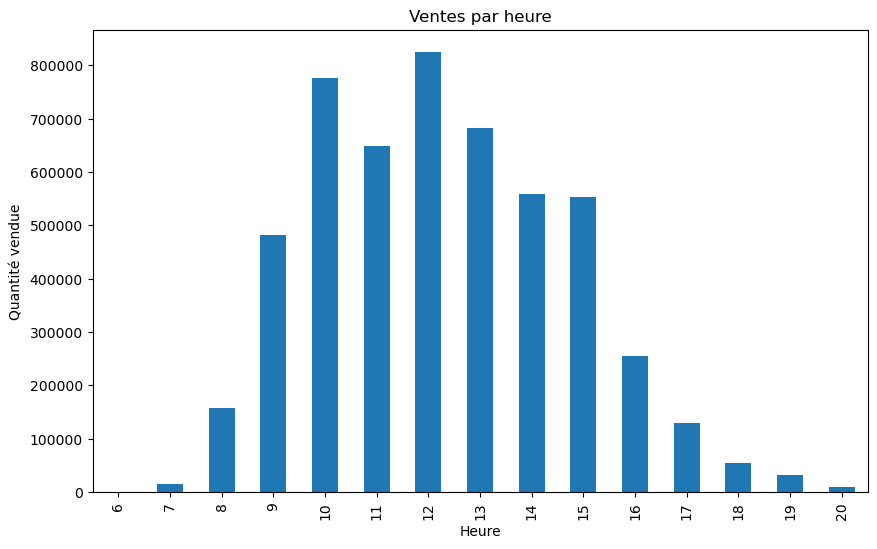

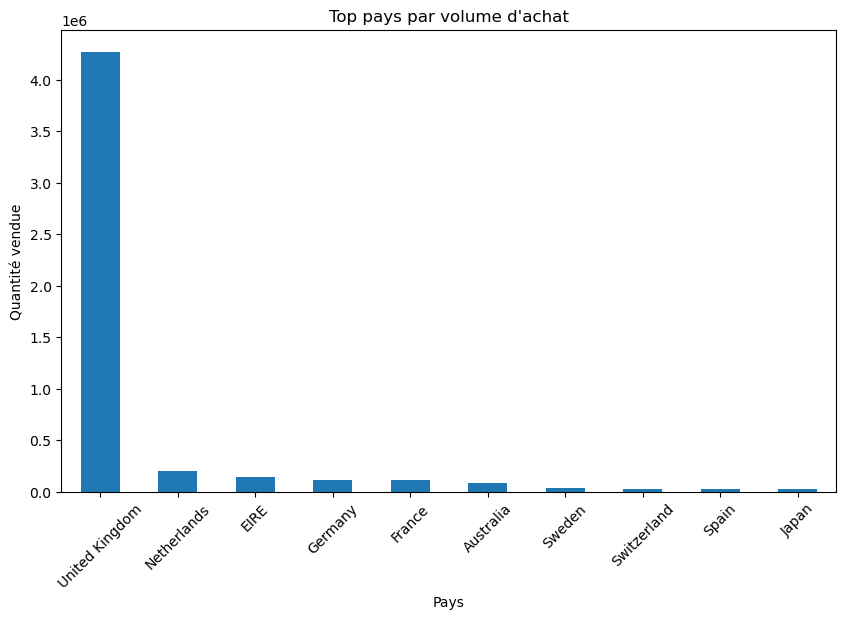

In [9]:
# -------------------------------------------
# 6. Visualisations
# -------------------------------------------
# Top produits
plt.figure(figsize=(10,6))
top_products.plot(kind='bar')
plt.title('Top 10 produits les plus vendus')
plt.xlabel('Produit')
plt.ylabel('Quantité vendue')
plt.xticks(rotation=45)
plt.show()

# Ventes par heure
plt.figure(figsize=(10,6))
sales_by_hour.plot(kind='bar')
plt.title('Ventes par heure')
plt.xlabel('Heure')
plt.ylabel('Quantité vendue')
plt.show()

# Pays les plus actifs
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar')
plt.title('Top pays par volume d\'achat')
plt.xlabel('Pays')
plt.ylabel('Quantité vendue')
plt.xticks(rotation=45)
plt.show()